4.합성곱 신경망

Contents
<div id="toc"></div>

2차원 형태의 그림을 1차원 형태로 변환하여 학습 -> 픽셀 간의 관계, 데이터의 feature가 제대로 전달될까?

# 1. 합성곱 신경망 (CNN; Convolutional Neural Network)

- 대뇌의 시각 피질(cortex)에 대한 연구를 통해 얻은 영감을 바탕으로 구축한 인공신경망 구조
    - 각 뉴런들은 국부적 수용 영역(local receptive field)을 가진다.  
      (즉, 각각의 뉴런은 전체 시야에서 특정한 일부 범위 내에 있는 자극에 개별적으로 반응한다.)
    - 큰 수용 영역을 가지는 고수준 뉴런들은 저수준의 뉴런들이 인식한 패턴들끼리 조합된 복잡한 패턴을 감지한다.

- 완전히 상호 연결된(fully-connected) DNN에서는 층이 깊어질수록 학습 효과가 감소하는 경향이 있으며, 또한 이미지의 분류를 수행할 때 원래 데이터의 형상(shape)이 무시된다.
- 합성곱 신경망은 **합성곱(convolution)** 과 **풀링(pooling)** 을 통해서 이미지 데이터의 형상 정보를 유지하면서 학습하여 이미지 인식 및 처리의 성능을 향상시킨 신경망이다.
<img src="img/ch4_1.png" width="70%">
※ Feature Learning = Feature Extracting

- [<span class="mark">합성곱층(convolutional layer) → 활성화 함수 적용 → 풀링층(pooling layer)</span>] 이 반복된 후에 완전히 상호 연결된 결합 은닉층이 추가되며, 최종적으로 출력층이 배치된다.   <img src="img/ch4_2.png" width="70%"> 
    - 합성곱층은 이미지 데이터의 특성을 추출하는 역할을 한다.
    - 풀링층은 추출된 특성 정보를 축소하는 역할을 한다.
    - 출력층 직전의 은닉층은 2차원 이상의 형상 특성 정보들을 1차원 형태로 변환/전개하는 역할을 한다. 

# 2. 연산 방법

## 2.1. 합성곱 (Convolution)

- 이미지 처리 관점에서의 합성곱은 일종의 필터링(filtering) 또는 마스킹(masking) 기능이다.
<img src="img/ch4_3.png" width="70%"> 

- 필터(커널)에서 실행하는 연산은 입력 데이터와 가중치의 곱에 대한 합계를 구하는 것이다.
- 결국 필터가 수행하는 기능은 인공 신경망에서 노드의 연산과 동일하다. 즉, CNN에서 각각의 **노드는 필터 그 자체**이다.

## 2.2. 패딩 (Padding)

- 패딩은 합성곱을 수행할 때 입력 데이터의 주변 픽셀을 특정값으로 채워 늘리는 것을 의미한다.
    - 패딩을 하지 않으면 데이터의 공간적 크기가 층을 지날 때마다 점점 작아져서 가장자리의 정보가 소실된다.
    - 패딩을 함으로써 현재 층의 입력 데이터의 공간적 크기가 유지된 상태로 출력을 다음 층으로 전달할 수 있다.
    - 일반적으로는 가장자리에 0을 채우는 제로 패딩이 주로 사용된다.
<img src="img/ch4_4.png" width="50%"> 

## 2.3. 스트라이드 (Stride)

- 스트라이드는 입력 데이터에 필터가 적용될 때 필터가 이동하는 간격이다.
    - 스트라이드 값이 클수록 출력의 공간적 크기가 작아지므로 일반적으로 스트라이드를 작은 값으로 지정한다.
    - 필터의 적용 횟수는 필터의 크기 자체보다는 스트라이드 값에 의해서 더 영향을 받게 된다.
<img src="img/ch4_5.png" width="80%"> 

※ stride 값이 클수록 원하지 않는 feature 정보가 남아 있을 수 있다.

## 2.4. 풀링 (Pooling)

- 풀링은 구역 내에서 대표 값만 추출함으로써 출력의 공간적 크기를 줄이는 기법이다.
    - 최대 풀링, 평균 풀링, 최소 풀링이 있으며 일반적으로는 **최대 풀링(max pooling)** 을 사용한다.
<img src="img/ch4_6.png" width="70%"> 

## 2.5. 드롭아웃 (Dropout)

- 드롭아웃은 일부 노드들을 삭제함으로써 학습에 영향을 주지않도록 처리하여 과대적합을 방지하는 기법이다.
    - 삭제 대상 노드는 무작위의 비율 값에 따라서 선택된다.
    - 기본적으로는 완전히 상호 연결된 결합 은닉층에 대해서 실행하지만, 그 이전 단계에서 적용할 수도 있다.

<img src="img/ch4_7.png" width="70%"> 

# 실습) 케라스로 CNN 학습 수행

1. 데이터를 준비한다.
    - MNIST 데이터를 불러와서 전처리 후 분리한다

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X = (mnist.data/255).reshape(len(mnist.data), 28, 28, 1)
y = to_categorical(mnist.target.astype(np.int), 10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

2. 인공 신경망 모형을 구성한다.
    - **models**의 **Sequential**을 이용하여 신경망의 층을 순서대로 쌓을 수 있도록 초기화한다.
    - **layers**의 **Dense**를 이용하여 입력과 출력이 모두 연결된 은닉층(들)과 출력층을 추가한다.
        - **units**는 해당 층에 배치할 노드 수이다.
        - **input_dim**은 입력 특성의 수, 즉 입력 노드의 개수이다. 최초 은닉층 외에는 기재하지 않는다.
        - **kernel_initializer**는 가중치들의 초기화, 설정 방법에 해당한다.
        - **activation**은 활성화 함수이다
    - **layers.convolutional**의 **Conv2D**를 이용하여 합성곱층을 추가한다.
        - **filters**는 필터(커널)의 개수이다.
        - **kernel_size**는 필터(커널)의 크기이다.
        - **strides**는 스트라이드 값으로, Conv2D에서는 2차원 형태이다.
        - **padding**은 패딩 적용 방법으로서, “Same”으로 설정하면 제로 패딩이 적용된다.
        - **activation**은 활성화 함수이다.
        - **input_shape**는 입력 특성의 형태이다. 최초 은닉층 외에는 기재하지 않는다.
        
    - **layers.convolutional**의 **MaxPooling2D**는 풀링층이다.
        - **pool_size**는 적용할 풀링 크기이다.
    - **layers**의 **Flatten**은 다차원 데이터를 1차원으로 변환해주는 층이다. 이 층을 추가해서 완전 연결된 결합 은닉층으로 출력을 보낸다.
    - **layers**의 **Dropout**은 현재까지 적재된 층의 노드들 중에서 지정된 비율만큼 드롭아웃을 수행한다.
        - **rate**는 적용할 드롭아웃 비율이다.


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

3. 모형의 학습 과정에 대한 설정을 한다.
    - 모형에 대해 **compile** 함수를 이용하여 설정을 한다.
        - **loss**는 손실 함수이다. 대부분 이진 분류인 경우에는‘binary_crossentropy’, 다중 클래스 분류인 경우에는‘categorical_crossentropy’를 사용한다.
        - **optimizer**는 가중치를 최적화 하기 위해서 적용되는 알고리즘의 이름이다.
        - **metrics**는 모형의 성능 평가 지표가 나열되는 목록이며, 기본적으로 ‘accuracy’가 포함된다.   
          
          
- MNIST 데이터는 다중 클래스 분류에 해당하므로, 손실함수를 ‘categorical_crossentropy’로 지정하였다. 또한, 최적화 기법은 ‘adam’을 선정하였다

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

※ 설정된 모형에 대해 summary 함수를 이용하여 상태를 확인해 볼 수 있다.

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

4. 모형을 학습시킨다.
    - 모형에 대해 **fit** 함수를 이용하여 학습을 수행한다. 학습데이터 외의 추가 옵션은 아래와 같다.
        - **epochs**는 학습의 반복 횟수이다.
        - **batch_size**는 배치의 크기이다.
        - **verbose**는 학습 경과를 출력하는 옵션으로, 0은 출력하지 않음, 1은 매 학습 단계마다 진행 막대(progress bar)와 상태를 함께 출력, 2는 진행 막대 없이 매 학습단계의 상태를 출력하는 것이다
        
        
- 에폭을 10, 배치 크기를 100으로 지정하여 학습을 수행하였다

In [11]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
490/490 - 44s - loss: 0.0421 - accuracy: 0.9873
Epoch 2/10
490/490 - 44s - loss: 0.0292 - accuracy: 0.9911
Epoch 3/10
490/490 - 44s - loss: 0.0232 - accuracy: 0.9925
Epoch 4/10
490/490 - 44s - loss: 0.0200 - accuracy: 0.9934
Epoch 5/10
490/490 - 44s - loss: 0.0161 - accuracy: 0.9947
Epoch 6/10
490/490 - 44s - loss: 0.0144 - accuracy: 0.9952
Epoch 7/10
490/490 - 44s - loss: 0.0130 - accuracy: 0.9956
Epoch 8/10
490/490 - 45s - loss: 0.0108 - accuracy: 0.9966
Epoch 9/10
490/490 - 45s - loss: 0.0088 - accuracy: 0.9971
Epoch 10/10
490/490 - 44s - loss: 0.0092 - accuracy: 0.9973


※ 학습 결과를 명시적으로 반환한 뒤 **history** 기능을 이용하여 손실과 정확도의 변화를 별도로 확인할 수도 있다.‘acc’는 훈련 정확도, ‘loss’는 훈련 손실값, ‘val_acc’는 검증 정확도, ‘val_loss’는 검증 손실값이다.

In [13]:
hist.history['accuracy']

[0.9872652888298035,
 0.9911020398139954,
 0.9924693703651428,
 0.993387758731842,
 0.994653046131134,
 0.9951836466789246,
 0.9956326484680176,
 0.99657142162323,
 0.9971428513526917,
 0.9972652792930603]

In [14]:
hist.history['loss']

[0.04210260510444641,
 0.029200149700045586,
 0.023169102147221565,
 0.020033515989780426,
 0.01608171872794628,
 0.014414235949516296,
 0.013028529472649097,
 0.010776088573038578,
 0.008819772861897945,
 0.009157243184745312]

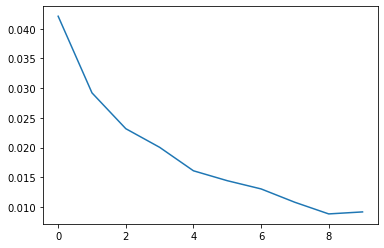

In [17]:
from pandas import Series
Series(hist.history['loss']).plot()

5. 모형의 성능을 평가한다
    - 모형에 대해 **evaluate** 함수를 이용하여 평가를 수행한다. 반환되는 결과는 손실값과 정확도가 항목인 튜플이다.

In [18]:
loss, acc = model.evaluate(X_test, y_test)

657/657 [==============================] - 5s 7ms/step - loss: 0.0391 - accuracy: 0.9897


In [19]:
print('손실값 :', round(loss, 3))
print('정확도 :', round(acc, 3))

손실값 : 0.039
정확도 : 0.99


6. 임의의 데이터에 대해서 모형의 출력을 확인한다.
    - 최종 시험용 데이터 집합이 별도로 존재하는 경우에는 그 데이터를 이용하여 출력을 확인하면 된다.
    - 별도의 시험용 데이터가 없는 경우, 검증 데이터(X_test, y_test)를 재사용하거나 임의로 데이터를 직접 생성하여 출력을 확인해 볼 수 있다.

    
- 모형에 대해 **predict** 함수를 이용하여 출력을 확인한다. 이 때의 결과는 출력층의 활성화 함수에 의해 추정된 확률(소프트맥스 점수)이다.


In [20]:
y_pred = model.predict(X_test)
print(y_pred[0:3])

[[1.2201239e-09 1.4907185e-13 8.4486362e-17 4.4474888e-15 1.3018259e-13
  3.5792820e-02 9.6402621e-01 1.6495518e-14 1.8104940e-04 1.1571222e-12]
 [2.8546961e-02 5.9147137e-08 9.5466948e-01 6.9642636e-05 1.7663396e-07
  7.6265962e-07 6.4295214e-10 9.4714260e-04 1.5765302e-02 4.8837967e-07]
 [4.1113239e-15 2.9877068e-08 5.4821243e-07 5.0615583e-08 1.9612021e-07
  2.2941907e-12 2.8759752e-15 9.9999917e-01 8.0358831e-11 2.7179885e-08]]


- 모형에 대해 **predict_classes** 함수를 이용하여 출력을 확인한다. 이 때의 결과는 분류된 클래스(레이블)이다.

In [21]:
y_pred_class = model.predict_classes(X_test)
print(y_pred_class[0:3])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[6 2 7]


기본 CNN 구조의 확장 및 변형
- 기본 구조로부터 다양한 형태의 변종이 개발 및 연구되었고, ILSVRC 이미지 인식 경연 대회에서 성능을 검증 받았다.
    - AlexNet (2012)
    - ZFNet (2013)
    - GoogLeNet (2014)
    - VGGNet (2014)
    - ResNet(2015)
    - GoogLeNet-v4 (2016)
    - SENet (2017)

In [ ]:
%%javascript
$.getScript('https://seareale.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')